In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [95]:
users = pd.read_csv(r'C:\Users\panov\Desktop\users.csv')

In [96]:
transactions = pd.read_csv(r'C:\Users\panov\Desktop\transactions.csv')

In [97]:
marketing = pd.read_csv(r'C:\Users\panov\Desktop\marketing.csv')

# Проверка данных на ошибки

In [98]:
users.head(5)

,Unnamed: 0,user_id,created_at,birth_date,gender
0,1,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male
1,2,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female
2,3,2d944cc5996ba4e1,2021-06-06 21:55:39,1995-03-05,male
3,4,935d7cac3351d579,2021-09-27 22:49:08,1994-06-05,male
4,5,c4a9ab70542f61cb,2021-12-07 03:12:43,1979-08-01,female


In [99]:
users.tail(5)

,Unnamed: 0,user_id,created_at,birth_date,gender
9995,9996,f1549af2b3afa6e2,2021-01-14 08:21:03,1971-12-10,male
9996,9997,4ab38083a326e23d,2021-09-28 15:35:54,2001-11-08,male
9997,9998,0d02528b546b9cb6,2021-08-09 23:52:18,1989-12-13,female
9998,9999,8790d57345a276fe,2021-07-24 04:05:39,1997-05-02,female
9999,10000,302eae5ccad4c474,2021-07-15 09:22:25,2001-12-16,female


In [100]:
users = users.drop('Unnamed: 0', axis=1)

In [101]:
users.head(5)

,user_id,created_at,birth_date,gender
0,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male
1,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female
2,2d944cc5996ba4e1,2021-06-06 21:55:39,1995-03-05,male
3,935d7cac3351d579,2021-09-27 22:49:08,1994-06-05,male
4,c4a9ab70542f61cb,2021-12-07 03:12:43,1979-08-01,female


In [102]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     10000 non-null  object
 1   created_at  10000 non-null  object
 2   birth_date  10000 non-null  object
 3   gender      10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [103]:
users['gender'].unique()

array(['male', 'female'], dtype=object)

In [104]:
transactions.head(5)

,Unnamed: 0,transaction_id,created_at,user_id,amount
0,1,e8152ef72822baae14866c30d5155ec8,2022-04-27 21:58:28,e1d22453e5f60161,213
1,2,9305700c4b7364cda47edaf6990ab7bc,2022-02-19 14:57:37,e1d22453e5f60161,128
2,3,3e89681d4f3d62beed4db199c719da8f,2021-12-09 20:40:10,e1d22453e5f60161,391
3,4,50c2d79c35513eaa1864999106f91dc3,2022-04-30 09:09:54,e08aa20152ca92c7,163
4,5,ce34444f31415fe2993d5b1dbe2ac846,2021-11-05 05:45:31,e08aa20152ca92c7,329


In [105]:
transactions.tail(5)

,Unnamed: 0,transaction_id,created_at,user_id,amount
75054,75055,ad3db24fa47d767af987a26b85784af1,2021-10-22 17:53:00,679717fce6ce88a1,525
75055,75056,dcc0d7c6dcec428dd5b58bf0432b7922,2022-03-21 15:41:20,679717fce6ce88a1,897
75056,75057,c0244272ac376ff640866b5c3a60ed80,2021-10-14 07:16:19,679717fce6ce88a1,572
75057,75058,dd78af98e0f9f5a25a9976402fc1f235,2022-02-05 12:57:34,679717fce6ce88a1,936
75058,75059,ac284e6940b11f325c9b8e311b032bd2,2022-04-01 13:33:13,679717fce6ce88a1,406


In [106]:
transactions = transactions.drop('Unnamed: 0', axis=1)

In [107]:
transactions.head(5)

,transaction_id,created_at,user_id,amount
0,e8152ef72822baae14866c30d5155ec8,2022-04-27 21:58:28,e1d22453e5f60161,213
1,9305700c4b7364cda47edaf6990ab7bc,2022-02-19 14:57:37,e1d22453e5f60161,128
2,3e89681d4f3d62beed4db199c719da8f,2021-12-09 20:40:10,e1d22453e5f60161,391
3,50c2d79c35513eaa1864999106f91dc3,2022-04-30 09:09:54,e08aa20152ca92c7,163
4,ce34444f31415fe2993d5b1dbe2ac846,2021-11-05 05:45:31,e08aa20152ca92c7,329


In [108]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75059 entries, 0 to 75058
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  75059 non-null  object
 1   created_at      75059 non-null  object
 2   user_id         75059 non-null  object
 3   amount          75059 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [109]:
transactions.describe()

,amount
count,75059.000000
mean,1162.700076
std,1225.071954
min,100.000000
25%,342.000000
50%,737.000000
75%,1534.000000
max,16219.000000


In [110]:
marketing.head(5)

,Название кампании,Возраст,Пол,Тип ставки,Бюджет,Показы,Клики,Первая покупка,CTR,CPM,CPC
0,CPC_female_18-24,18-24,female,CPC,1492716,5237600,78564,271,"0,015",285,19
1,CPC_male_18-24,18-24,male,CPC,1289193,4213049,71622,211,"0,017",306,18
2,CPC_female_25-34,25-34,female,CPC,4338761,19283382,173550,545,"0,009",225,25
3,CPC_male_25-34,25-34,male,CPC,4399725,16175460,137491,410,"0,0085",272,32
4,CPC_female_35-44,35-44,female,CPC,2578613,4775209,57303,219,"0,012",540,45


In [111]:
marketing.tail(5)

,Название кампании,Возраст,Пол,Тип ставки,Бюджет,Показы,Клики,Первая покупка,CTR,CPM,CPC
5,CPC_male_35-44,35-44,male,CPC,2348610,4414680,61806,216,"0,014",532,38
6,CPC_female_45-54,45-54,female,CPC,908437,1740301,31325,89,"0,018",522,29
7,CPC_male_45-54,45-54,male,CPC,782971,2151019,27963,89,"0,013",364,28
8,CPC_female_55+,55+,female,CPC,402817,963677,10600,44,"0,011",418,38
9,CPC_male_55+,55+,male,CPC,420199,1077433,10774,35,"0,01",390,39


In [112]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Название кампании  10 non-null     object
 1   Возраст            10 non-null     object
 2   Пол                10 non-null     object
 3   Тип ставки         10 non-null     object
 4   Бюджет             10 non-null     int64 
 5   Показы             10 non-null     int64 
 6   Клики              10 non-null     int64 
 7   Первая покупка     10 non-null     int64 
 8   CTR                10 non-null     object
 9   CPM                10 non-null     int64 
 10  CPC                10 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 1008.0+ bytes


In [113]:
marketing.describe()

,Бюджет,Показы,Клики,Первая покупка,CPM,CPC
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.00000
mean,1.896204e+06,6.003181e+06,66099.800000,212.900000,385.400000,31.10000
std,1.492912e+06,6.414669e+06,53467.325927,164.466444,115.742242,8.94986
min,4.028170e+05,9.636770e+05,10600.000000,35.000000,225.000000,18.00000
25%,8.143375e+05,1.842980e+06,28803.500000,89.000000,290.250000,25.75000
50%,1.390954e+06,4.313864e+06,59554.500000,213.500000,377.000000,30.50000
75%,2.521112e+06,5.122002e+06,76828.500000,258.000000,496.000000,38.00000
max,4.399725e+06,1.928338e+07,173550.000000,545.000000,540.000000,45.00000


# Обработка данных

## Приведём даты к нужному типу

In [114]:
users['created_at'] = pd.to_datetime(users['created_at'])

In [115]:
users['birth_date'] = pd.to_datetime(users['birth_date'])

In [116]:
users.head(5)

,user_id,created_at,birth_date,gender
0,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male
1,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female
2,2d944cc5996ba4e1,2021-06-06 21:55:39,1995-03-05,male
3,935d7cac3351d579,2021-09-27 22:49:08,1994-06-05,male
4,c4a9ab70542f61cb,2021-12-07 03:12:43,1979-08-01,female


In [117]:
users.dtypes

user_id               object
created_at    datetime64[ns]
birth_date    datetime64[ns]
gender                object
dtype: object

In [118]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

In [119]:
transactions.head(5)

,transaction_id,created_at,user_id,amount
0,e8152ef72822baae14866c30d5155ec8,2022-04-27 21:58:28,e1d22453e5f60161,213
1,9305700c4b7364cda47edaf6990ab7bc,2022-02-19 14:57:37,e1d22453e5f60161,128
2,3e89681d4f3d62beed4db199c719da8f,2021-12-09 20:40:10,e1d22453e5f60161,391
3,50c2d79c35513eaa1864999106f91dc3,2022-04-30 09:09:54,e08aa20152ca92c7,163
4,ce34444f31415fe2993d5b1dbe2ac846,2021-11-05 05:45:31,e08aa20152ca92c7,329


In [120]:
transactions.dtypes

transaction_id            object
created_at        datetime64[ns]
user_id                   object
amount                     int64
dtype: object

## Рассчитаем возраст пользователей для разбиения их на группы и дальнейшего анализа

In [121]:
users['age'] = (pd.to_datetime('now') - users['birth_date']) // timedelta(days=365.2425)

D:\anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [122]:
users.head(5)

,user_id,created_at,birth_date,gender,age
0,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male,66
1,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female,37
2,2d944cc5996ba4e1,2021-06-06 21:55:39,1995-03-05,male,27
3,935d7cac3351d579,2021-09-27 22:49:08,1994-06-05,male,28
4,c4a9ab70542f61cb,2021-12-07 03:12:43,1979-08-01,female,43


In [123]:
marketing['Название кампании'].unique()

array(['CPC_female_18-24', 'CPC_male_18-24', 'CPC_female_25-34',
       'CPC_male_25-34', 'CPC_female_35-44', 'CPC_male_35-44',
       'CPC_female_45-54', 'CPC_male_45-54', 'CPC_female_55+',
       'CPC_male_55+'], dtype=object)

In [124]:
def age_group(age, gender):
    try:
        if 18 <= age <= 24:
            if gender == 'male':
                return  'CPC_male_18-24'
            else:
                return  'CPC_female_18-24'
        if 25 <= age <= 34:
            if gender == 'male':
                return  'CPC_male_25-34'
            else:
                return  'CPC_female_25-34'
        if 35 <= age <= 44:
            if gender == 'male':
                return  'CPC_male_35-44'
            else:
                return  'CPC_female_35-44'
        if 45 <= age <= 54:
            if gender == 'male':
                return  'CPC_male_45-54'
            else:
                return  'CPC_female_45-54'
        if 55 <= age:
            if gender == 'male':
                return  'CPC_male_55+'
            else:
                return  'CPC_female_55+'            
    except:
        pass

In [125]:
users['age_group'] = users[['age', 'gender']].apply(lambda x: age_group(*x) , axis=1)

In [126]:
users.head(5)

,user_id,created_at,birth_date,gender,age,age_group
0,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male,66,CPC_male_55+
1,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female,37,CPC_female_35-44
2,2d944cc5996ba4e1,2021-06-06 21:55:39,1995-03-05,male,27,CPC_male_25-34
3,935d7cac3351d579,2021-09-27 22:49:08,1994-06-05,male,28,CPC_male_25-34
4,c4a9ab70542f61cb,2021-12-07 03:12:43,1979-08-01,female,43,CPC_female_35-44


## Cоединим наши таблички users и transactions в одну для дальнейшего анализа

In [127]:
users_trans = users.merge(transactions, on = 'user_id')

In [128]:
users_trans.head(5)

,user_id,created_at_x,birth_date,gender,age,age_group,transaction_id,created_at_y,amount
0,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male,66,CPC_male_55+,8b8d2f4374c677b9e98495b9ec9f7284,2021-05-09 08:37:02,184
1,f931ccace226da1c,2021-02-02 13:21:15,1956-08-05,male,66,CPC_male_55+,922d9169dc1545912d56ac13de715005,2021-09-08 07:40:02,2328
2,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female,37,CPC_female_35-44,092b25e3aeea53eb8edd0f4fdb43af9c,2021-12-10 04:27:32,4450
3,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female,37,CPC_female_35-44,d68d22fe215973be3f0ecc9502cf7a62,2022-01-03 03:33:29,373
4,65aab0ca32b7e096,2021-03-09 05:19:25,1985-01-31,female,37,CPC_female_35-44,b33a0a61fd900f802a58dbe1d7648679,2022-02-01 13:03:13,912


In [129]:
users_trans.tail(5)

,user_id,created_at_x,birth_date,gender,age,age_group,transaction_id,created_at_y,amount
75054,8790d57345a276fe,2021-07-24 04:05:39,1997-05-02,female,25,CPC_female_25-34,d0914baa833c5bc0fe9e39df25fdaead,2022-03-10 03:50:35,151
75055,8790d57345a276fe,2021-07-24 04:05:39,1997-05-02,female,25,CPC_female_25-34,04d421cf5ed506697379da06f7ecd5d8,2021-11-20 16:53:37,339
75056,302eae5ccad4c474,2021-07-15 09:22:25,2001-12-16,female,21,CPC_female_18-24,774f0293dca6ba504be0b3568f1539e4,2021-11-21 23:13:15,109
75057,302eae5ccad4c474,2021-07-15 09:22:25,2001-12-16,female,21,CPC_female_18-24,69c8b5027989c654046cf50653a2fe33,2021-11-11 04:03:16,769
75058,302eae5ccad4c474,2021-07-15 09:22:25,2001-12-16,female,21,CPC_female_18-24,22dce766cb7aa74d53120434b7f12a93,2022-03-05 02:00:17,2389


In [130]:
users_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75059 entries, 0 to 75058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         75059 non-null  object        
 1   created_at_x    75059 non-null  datetime64[ns]
 2   birth_date      75059 non-null  datetime64[ns]
 3   gender          75059 non-null  object        
 4   age             75059 non-null  int64         
 5   age_group       75059 non-null  object        
 6   transaction_id  75059 non-null  object        
 7   created_at_y    75059 non-null  datetime64[ns]
 8   amount          75059 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 5.7+ MB


# Анализ данных

Первоначально рассчитаем ROI для каждой рекламной акции

## Расчёт ROI

ROI — коэффициент окупаемости. Этот показатель демонстрирует прибыльность или убыточность той или иной инвестиции. Рассчитывается по формуле: __`(Доход от вложений - размер вложений) / Размер вложений * 100%`__

In [131]:
marketing.head(5)

,Название кампании,Возраст,Пол,Тип ставки,Бюджет,Показы,Клики,Первая покупка,CTR,CPM,CPC
0,CPC_female_18-24,18-24,female,CPC,1492716,5237600,78564,271,"0,015",285,19
1,CPC_male_18-24,18-24,male,CPC,1289193,4213049,71622,211,"0,017",306,18
2,CPC_female_25-34,25-34,female,CPC,4338761,19283382,173550,545,"0,009",225,25
3,CPC_male_25-34,25-34,male,CPC,4399725,16175460,137491,410,"0,0085",272,32
4,CPC_female_35-44,35-44,female,CPC,2578613,4775209,57303,219,"0,012",540,45


In [132]:
marketing = marketing.rename(columns = {'Название кампании':'age_group'})

In [133]:
sum_by_group = users_trans.groupby('age_group', as_index = False)['amount'].sum() \
.merge(marketing, on = 'age_group')[['age_group', 'Бюджет', 'amount']]

In [134]:
sum_by_group

,age_group,Бюджет,amount
0,CPC_female_18-24,1492716,4579011
1,CPC_female_25-34,4338761,24899415
2,CPC_female_35-44,2578613,18160102
3,CPC_female_45-54,908437,6549392
4,CPC_female_55+,402817,2319843
5,CPC_male_18-24,1289193,2159076
6,CPC_male_25-34,4399725,13199609
7,CPC_male_35-44,2348610,8979779
8,CPC_male_45-54,782971,4739299
9,CPC_male_55+,420199,1685579


In [135]:
sum_by_group['ROI'] = (sum_by_group['amount'] - sum_by_group['Бюджет']) / sum_by_group['Бюджет'] * 100

In [136]:
sum_by_group

,age_group,Бюджет,amount,ROI
0,CPC_female_18-24,1492716,4579011,206.757012
1,CPC_female_25-34,4338761,24899415,473.883074
2,CPC_female_35-44,2578613,18160102,604.258530
3,CPC_female_45-54,908437,6549392,620.951701
4,CPC_female_55+,402817,2319843,475.904939
5,CPC_male_18-24,1289193,2159076,67.475002
6,CPC_male_25-34,4399725,13199609,200.009864
7,CPC_male_35-44,2348610,8979779,282.344408
8,CPC_male_45-54,782971,4739299,505.296876
9,CPC_male_55+,420199,1685579,301.138270


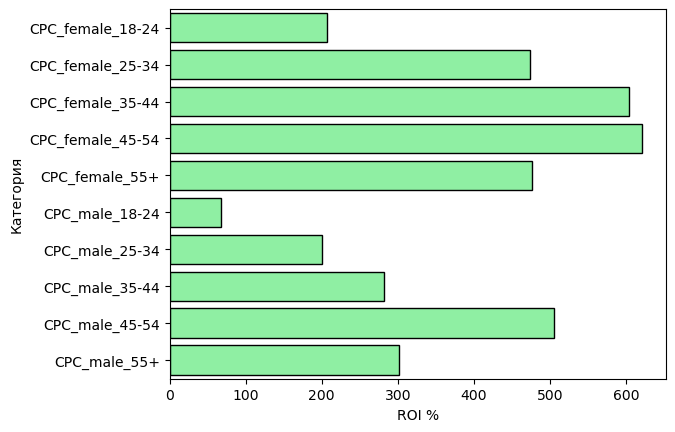

In [137]:
ax = sns.barplot(data = sum_by_group, x = 'ROI', y = 'age_group', color=(0.5, 1, 0.6, 1),  edgecolor='black')
ax.set(xlabel='ROI %', ylabel='Категория')
ax;

По анализу и графику видно, что единственная рекламная кампания, которая не окупилась - это __CPC-male_18-24__, то есть для мужчин от 18 до 24 лет.

## Расчёт различных показателей по группам

### Рассчитаем долю мужчин и женщин

Посчитаем соотношение мужчин и женщин среди всех пользователей

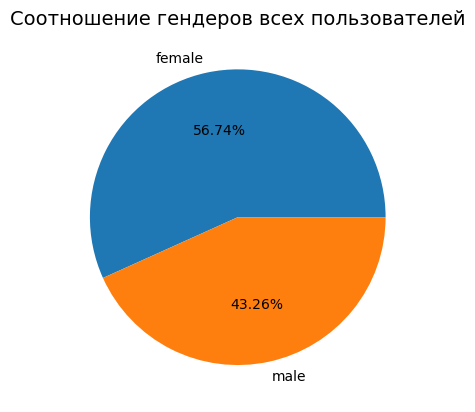

In [138]:
users.value_counts('gender').plot.pie(autopct="%.2f%%", label =  '')
plt.title("Соотношение гендеров всех пользователей", fontsize=14);

Посчитаем соотношение женщин и мужчин, которые совершали покупки.

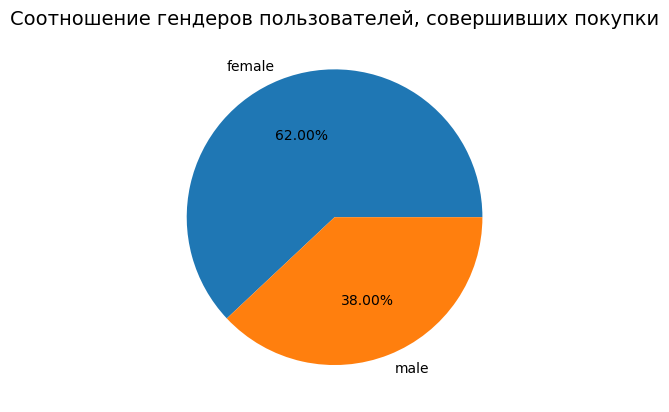

In [139]:
users_trans.drop_duplicates(subset = ["user_id"]).value_counts('gender').plot.pie(autopct="%.2f%%", label = '');
plt.title("Соотношение гендеров пользователей, совершивших покупки", fontsize=14);

Можно сделать вывод, что среди аудитории больше женщин. Также женщины чаще совершают покупки.

### Рассчитаем AOV - средний чек по группам.

AOV расчитывается по следующей формуле: __`общая выручка за выбранный период / число покупок за выбранный период`__

In [140]:
AOV = users_trans.groupby('age_group')['amount'].sum() / users_trans.groupby('age_group')['amount'].count()

In [141]:
AOV = pd.DataFrame(AOV).sort_values('amount', ascending = False).reset_index()

In [142]:
AOV

,age_group,amount
0,CPC_female_35-44,1712.086547
1,CPC_male_45-54,1523.890354
2,CPC_female_25-34,1306.987297
3,CPC_male_35-44,1299.721957
4,CPC_female_45-54,1240.885184
5,CPC_male_25-34,1144.904935
6,CPC_male_55+,977.147246
7,CPC_female_55+,945.331296
8,CPC_female_18-24,504.574215
9,CPC_male_18-24,405.765082


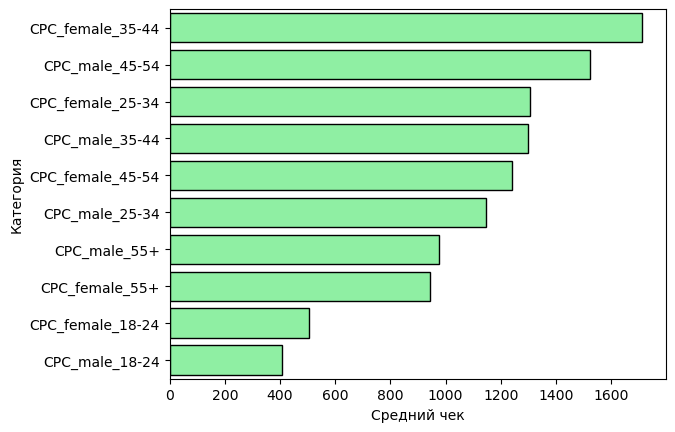

In [143]:
ax = sns.barplot(data = AOV, x = 'amount', y = 'age_group',  color=(0.5, 1, 0.6, 1),  edgecolor='black')
ax.set(xlabel='Средний чек', ylabel='Категория')
ax;

Самый большой средний чек у женщин в возрасте 35-44. К этому возрасту люди зачастую уже имеют стабильный заработок и семью. Также женщины имеют больший интерес к маркетплейсу, зачастую в семьях именно женщины делают заказ не только на себя, но и на членов семьи, за счёт этого именно у этой группы самый большой средний чек.

Самые низкие чеки имеют молодые люди в возрасте от 18 до 24 лет, в целом, это объясняется здравой логикой. Обычно в этом возрасте либо студенты, либо молодые специалисты в начале своей карьеры. Лишних денег на траты попросту нет, за счёт этого средний чек данных групп достаточно низок.

Чуть выше средний чек у мужчин и женщин в возрасте выше 54-х лет. Относительно невысокий средний чек можно объяснить консерватизмом старшего поколения, которые привыкли делать покупки в обычных магазинах.

### Рассчитаем Repeat Purchase Rate - коэффициент повторных покупок.

RPR вычисляется по формуле: __`Количество повторных клиентов / Общее число клиентов * 100 `__

Для начала вычислим общий RPR без разбиения на группы.

In [145]:
round(pd.DataFrame(users_trans.groupby('user_id')['transaction_id'].count()).reset_index()\
.query('transaction_id > 1')['user_id'].count() / users_trans.drop_duplicates(subset = ["user_id"])['user_id'].count() * 100, 1)

95.3

Общий RPR составляет 95 процентов. Это показывает, что наши клиенты продолжают сотрудничать с маркетплейсом в подавляющем большинстве